### Data Processing not finished

In [1]:
from matplotlib import pyplot as plt
from scipy.io import loadmat
import glob
import os
import numpy as np
import pandas as pd
#os.chdir('seed/Preprocessed_EEG')

In [2]:
cwd = os.getcwd()
cwd
os.chdir('/home/st122388/work/dsai project/seed/Preprocessed_EEG')

loading the preprocessed eeg matfile with total of 15 subjects

In [3]:
annots = loadmat('1_20131027.mat')
annots.keys()


dict_keys(['__header__', '__version__', '__globals__', 'djc_eeg1', 'djc_eeg2', 'djc_eeg3', 'djc_eeg4', 'djc_eeg5', 'djc_eeg6', 'djc_eeg7', 'djc_eeg8', 'djc_eeg9', 'djc_eeg10', 'djc_eeg11', 'djc_eeg12', 'djc_eeg13', 'djc_eeg14', 'djc_eeg15'])

In [5]:
type(annots['djc_eeg1']),annots['djc_eeg1'].shape

(numpy.ndarray, (62, 47001))

EEG1 plot which is already downsampled and in frequency domain

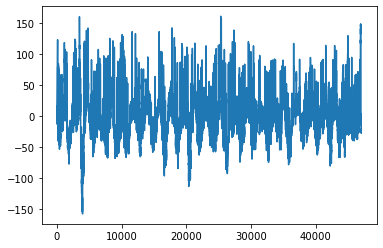

In [7]:
plt.plot(annots['djc_eeg1'][1,:])
plt.show()

62 electrodes channel

In [9]:
os.chdir('/home/st122388/work/dsai project/seed')
columns = pd.read_excel('channel-order.xlsx',header=None)
df_list = columns.T.values.tolist()

In [13]:
df_eeg1 = pd.DataFrame(annots['djc_eeg1'].T, columns=df_list)
df_eeg1

,FP1,FPZ,FP2,AF3,AF4,F7,F5,F3,F1,FZ,...,PO3,POZ,PO4,PO6,PO8,CB1,O1,OZ,O2,CB2
0,-11.622906,14.930964,38.057566,-11.801720,13.977289,7.092953,-4.559755,-11.295080,13.858080,-3.278255,...,14.960766,13.947487,37.401915,33.915043,20.176172,16.063452,31.262636,24.259090,26.822090,29.772520
1,-16.212463,8.076429,25.570393,-13.530254,3.814697,3.695488,-8.553267,-13.619661,11.295080,-6.228685,...,10.251999,14.483929,38.027763,31.173229,22.977591,6.407499,19.788742,15.497208,27.775764,33.557415
2,-17.136335,8.195639,37.997961,-12.725592,-2.205372,5.781651,-12.218952,-17.106533,7.867813,-9.357929,...,20.802021,18.358231,37.103891,33.080578,10.639429,16.301870,31.113625,21.517277,26.702881,30.398369
3,-26.762486,1.907349,23.514032,-18.417835,-3.963709,-2.801418,-20.444393,-23.812056,7.003546,-11.503696,...,23.573637,21.696091,40.084124,32.007694,12.993813,26.911497,41.365623,28.222799,28.669834,30.994415
4,-21.517277,8.076429,31.918287,-13.053417,1.937151,2.712011,-11.235476,-15.527010,9.030104,-9.000301,...,17.464161,20.742416,41.604042,34.689903,26.136637,14.990568,27.805567,26.226044,32.782555,35.315752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46996,-44.286251,-23.066998,-55.432320,-37.461519,-33.676624,-29.683113,-2.831221,-28.759241,-21.338463,-15.884638,...,3.457069,-1.549721,4.380941,-2071.201801,45.567751,9.924173,16.331673,3.963709,32.991171,28.312206
46997,-44.912100,-19.133091,-45.061111,-37.968159,-29.742718,-25.302172,-6.854534,-30.457973,-22.381544,-15.705824,...,8.821487,2.473593,6.228685,-2593.815327,43.570995,28.073788,33.497810,14.513731,37.848949,28.759241
46998,-46.104193,-24.318695,-54.061413,-37.878752,-37.163496,-45.925379,-6.854534,-32.216311,-21.129847,-20.027161,...,1.966953,-7.152557,-6.049871,-1446.276903,20.265579,11.801720,20.146370,7.629395,25.749207,20.027161
46999,-51.051378,-27.745962,-58.293343,-40.471554,-41.723251,-69.260597,-11.861324,-33.408403,-22.977591,-21.904707,...,5.930662,1.013279,0.387430,-926.554203,32.544136,37.878752,36.567450,17.344952,35.762787,30.159950


Since in the paper we need differential entrophy features and the datasets SEED which was provided has preprocessd datsets and features extracted datasets. We used Features Extracted Datasets for this work

In [14]:

os.chdir('/home/st122388/work/dsai project/seed/ExtractedFeatures')


# Get a list for .mat files in current folder
mat_files = glob.glob('*.mat')
label =loadmat('label.mat')
mat_files.remove('label.mat')
# List for stroring all the data
alldata = []

# Iterate mat files
for fname in mat_files:
    # Load mat file data into data.
    data = loadmat(fname)
    
    # Append data to the list
    alldata.append(data)

In [15]:
label

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sat Apr 18 22:14:56 2015',
 '__version__': '1.0',
 '__globals__': [],
 'label': array([[ 1,  0, -1, -1,  0,  1, -1,  0,  1,  1,  0, -1,  0,  1, -1]],
       dtype=int16)}

In [20]:
# Iterate alldata elelemts, and show images
for data in alldata:
    # The internal structure of the data is a dictionary with a dictionary.
    ecg = data['de_LDS1']
    #data = ecg['data'] # Data is a list of lists

    # Convert data to NumPy array
    ecg_data = np.array(ecg)

    # Show data as image using matplotlib
    #plt.imshow(img, cmap='gray')
    #plt.plot(ecg_data[:,:,1])  # Plot the data as graph.
    #plt.show(block=True)  # Show image with "blocking"

In [21]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'de_movingAve1', 'de_LDS1', 'psd_movingAve1', 'psd_LDS1', 'dasm_movingAve1', 'dasm_LDS1', 'rasm_movingAve1', 'rasm_LDS1', 'asm_movingAve1', 'asm_LDS1', 'dcau_movingAve1', 'dcau_LDS1', 'de_movingAve2', 'de_LDS2', 'psd_movingAve2', 'psd_LDS2', 'dasm_movingAve2', 'dasm_LDS2', 'rasm_movingAve2', 'rasm_LDS2', 'asm_movingAve2', 'asm_LDS2', 'dcau_movingAve2', 'dcau_LDS2', 'de_movingAve3', 'de_LDS3', 'psd_movingAve3', 'psd_LDS3', 'dasm_movingAve3', 'dasm_LDS3', 'rasm_movingAve3', 'rasm_LDS3', 'asm_movingAve3', 'asm_LDS3', 'dcau_movingAve3', 'dcau_LDS3', 'de_movingAve4', 'de_LDS4', 'psd_movingAve4', 'psd_LDS4', 'dasm_movingAve4', 'dasm_LDS4', 'rasm_movingAve4', 'rasm_LDS4', 'asm_movingAve4', 'asm_LDS4', 'dcau_movingAve4', 'dcau_LDS4', 'de_movingAve5', 'de_LDS5', 'psd_movingAve5', 'psd_LDS5', 'dasm_movingAve5', 'dasm_LDS5', 'rasm_movingAve5', 'rasm_LDS5', 'asm_movingAve5', 'asm_LDS5', 'dcau_movingAve5', 'dcau_LDS5', 'de_movingAve6', 'de_LDS6

In [22]:
data['dasm_LDS1'].shape

(27, 235, 5)

We used only differential entrophy moving average and differential entrophy linear dynamical system features. Since paper has only said about differential entrophy we will average this two features

In [23]:
for data in alldata:
    #data_1 = pd.DataFrame({k: v for k, v in data.items()},columns=df_list)
    data_1 = {k: v for k, v in data.items() if k.startswith('de')}
    

In [24]:
df_LDS15 = pd.DataFrame(data_1['de_LDS1'][:,:,4].T,columns=df_list)

In [25]:
df_LDS15

,FP1,FPZ,FP2,AF3,AF4,F7,F5,F3,F1,FZ,...,PO3,POZ,PO4,PO6,PO8,CB1,O1,OZ,O2,CB2
0,17.463854,17.055460,18.043682,16.849876,17.002261,17.817427,17.067851,16.963442,15.557505,15.293188,...,16.666216,15.763175,16.759280,17.619399,18.165613,16.873898,17.380232,16.328510,17.108311,16.751659
1,17.459311,17.052105,18.038293,16.846212,16.998216,17.814158,17.065512,16.961237,15.556411,15.292961,...,16.665333,15.760535,16.755887,17.616184,18.163754,16.871420,17.377301,16.325664,17.104929,16.749122
2,17.454650,17.047872,18.032468,16.841546,16.993379,17.811245,17.063502,16.959605,15.555461,15.292640,...,16.664669,15.757449,16.752199,17.612621,18.161542,16.868736,17.374009,16.322215,17.100649,16.746386
3,17.449519,17.044756,18.026643,16.836127,16.989677,17.808308,17.062461,16.958950,15.555971,15.293263,...,16.664106,15.754144,16.748291,17.609304,18.159548,16.866743,17.371200,16.318600,17.096190,16.744000
4,17.443264,17.040892,18.020677,16.830718,16.986145,17.805445,17.061013,16.957950,15.556266,15.293644,...,16.663709,15.751383,16.744651,17.606470,18.157843,16.865155,17.368729,16.315501,17.091825,16.741558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,17.895314,17.544355,18.721585,17.230183,17.596324,18.416160,17.675098,17.565704,15.956994,15.448728,...,16.949776,16.165100,17.094207,18.032462,18.458869,17.217860,17.890856,16.744687,17.553570,17.097008
231,17.897118,17.546643,18.723249,17.230879,17.598278,18.417469,17.675038,17.565638,15.957544,15.449804,...,16.947505,16.164438,17.094129,18.031955,18.458137,17.216096,17.889110,16.743244,17.551825,17.095640
232,17.898839,17.548712,18.724649,17.231394,17.600656,18.418166,17.674916,17.565500,15.958384,15.451184,...,16.945412,16.163974,17.094151,18.032014,18.457799,17.214422,17.887160,16.741910,17.550918,17.094844
233,17.900569,17.549810,18.725557,17.231944,17.602923,18.419498,17.675325,17.565788,15.959217,15.452569,...,16.943078,16.163196,17.093992,18.032071,18.457912,17.212250,17.884466,16.740091,17.550034,17.093830


We used 31 right hemispheric electrodes and 31 left hemispheric elctrodes for input according to the paper

In [26]:
df_LDS15_left = df_LDS15.loc[:,['FP1', 'AF3', 'F7', 'F5', 'F3',
'F1','FT7', 'FC5', 'FC3', 'FC1', 'T7', 'C5', 'C3', 'C1', 'TP7', 'CP5', 'CP3',
'CP1', 'P7', 'P5', 'P3', 'P1', 'PO7', 'PO5', 'PO3', 'CB1', 'O1', 'FPZ', 'FCZ',
'CPZ', 'POZ']]

In [27]:
df_LDS15_right = df_LDS15.loc[:,['FP2', 'AF4', 'F8',
'F6', 'F4', 'F2', 'FT8', 'FC6', 'FC4', 'FC2', 'T8', 'C6', 'C4', 'C2', 'TP8', 'CP6',
'CP4', 'CP2', 'P8', 'P6', 'P4', 'P2', 'PO8', 'PO6', 'PO4', 'CB2', 'O2', 'FZ', 'CZ',
'PZ', 'OZ']]

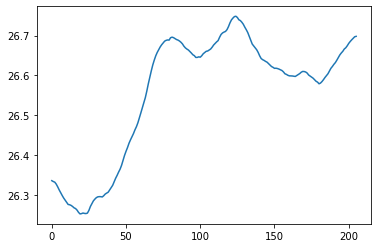

In [28]:
plt.plot(data_1['de_LDS15'][1,:,0])
plt.show()

## LSTM to get input features into another space to learn high level components information not finsihed

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [30]:
class LSTM(nn.Module):
    '''
    Expected Input Shape: (batch, seq_len, channels)
    '''
    def __init__(self, input_dim, hidden_dim, num_layers, num_classes, bidirectional, dropout):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, bidirectional=bidirectional, 
                            dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim * num_layers, num_classes)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        # Set initial hidden and cell states
        #*2 because it's bidirectional
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_dim).to(device).float()
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_dim).to(device).float()
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0)) # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :]) 
        out = self.softmax(out)

        return out